In [1167]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [1168]:
import csv


df = pd.read_csv('AB_NYC.csv')
len(df)

48895

In [1169]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,48885,48886,48887,48888,48889,48890,48891,48892,48893,48894
id,2539,2595,3647,3831,5022,5099,5121,5178,5203,5238,...,36482809,36483010,36483152,36484087,36484363,36484665,36485057,36485431,36485609,36487245
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park,Large Cozy 1 BR Apartment In Midtown East,BlissArtsSpace!,Large Furnished Room Near B'way,Cozy Clean Guest Room - Family Apt,Cute & Cozy Lower East Side 1 bdrm,...,Stunning Bedroom NYC! Walking to Central Park!!,Comfy 1 Bedroom in Midtown East,Garden Jewel Apartment in Williamsburg New York,"Spacious Room w/ Private Rooftop, Central loca...",QUIT PRIVATE HOUSE,Charming one bedroom - newly renovated rowhouse,Affordable room in Bushwick/East Williamsburg,Sunny Studio at Historical Neighborhood,43rd St. Time Square-cozy single bed,Trendy duplex in the very heart of Hell's Kitchen
host_id,2787,2845,4632,4869,7192,7322,7356,8967,7490,7549,...,131529729,274311461,208514239,274321313,107716952,8232441,6570630,23492952,30985759,68119814
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura,Chris,Garon,Shunichi,MaryEllen,Ben,...,Kendall,Scott,Melki,Kat,Michael,Sabrina,Marisol,Ilgar & Aysel,Taz,Christophe
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Manhattan,...,Manhattan,Manhattan,Brooklyn,Manhattan,Queens,Brooklyn,Brooklyn,Manhattan,Manhattan,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem,Murray Hill,Bedford-Stuyvesant,Hell's Kitchen,Upper West Side,Chinatown,...,East Harlem,Midtown,Williamsburg,Hell's Kitchen,Jamaica,Bedford-Stuyvesant,Bushwick,Harlem,Hell's Kitchen,Hell's Kitchen
latitude,40.64749,40.75362,40.80902,40.68514,40.79851,40.74767,40.68688,40.76489,40.80178,40.71344,...,40.79633,40.75561,40.71232,40.76392,40.69137,40.67853,40.70184,40.81475,40.75751,40.76404
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399,-73.975,-73.95596,-73.98493,-73.96723,-73.99037,...,-73.93605,-73.96723,-73.9422,-73.99183,-73.80844,-73.94995,-73.93317,-73.94867,-73.99112,-73.98933
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt,Entire home/apt,Private room,Private room,Private room,Entire home/apt,...,Private room,Entire home/apt,Entire home/apt,Private room,Private room,Private room,Private room,Entire home/apt,Shared room,Private room
price,149,225,150,89,80,200,60,79,79,150,...,75,200,170,125,65,70,40,115,55,90


In [1170]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

DATA PREPARATION
* first thing here is by making everything on the columns consistence. In this type of data it already consistent so, we look at each columns
* to make the object consistent, we need to get hold of them.
* to check for some empty or null columns, so as to replace them by zero or average

In [1171]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [1172]:
df.dtypes[df.dtypes == "object"]

name                   object
host_name              object
neighbourhood_group    object
neighbourhood          object
room_type              object
last_review            object
dtype: object

In [1173]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['name',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'room_type',
 'last_review']

In [1174]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


The null in the reviews per month was replaced by mean of the column.

In [1175]:
for c in ['reviews_per_month']:
    df[c] = df[c].replace(to_replace=np.nan, value=1.37)

In [1176]:

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    df[col] = df[col].replace(to_replace=np.nan, value='unk')
    
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean_&_quiet_apt_home_by_the_park,2787,john,brooklyn,kensington,40.64749,-73.97237,private_room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit_midtown_castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire_home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the_village_of_harlem....new_york_!,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private_room,150,3,0,unk,1.37,1,365
3,3831,cozy_entire_floor_of_brownstone,4869,lisaroxanne,brooklyn,clinton_hill,40.68514,-73.95976,entire_home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire_apt:_spacious_studio/loft_by_central_park,7192,laura,manhattan,east_harlem,40.79851,-73.94399,entire_home/apt,80,10,9,2018-11-19,0.10,1,0


In [1177]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

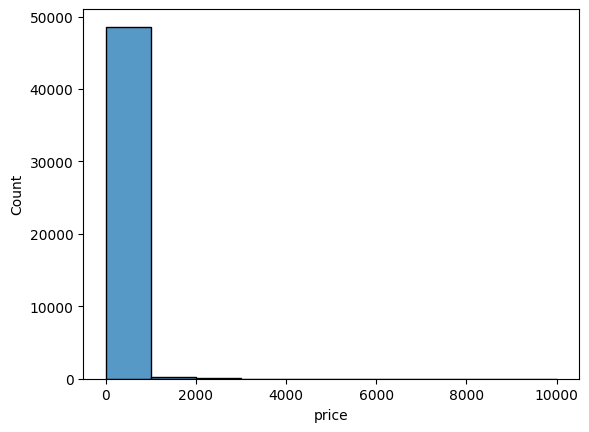

In [1178]:
sns.histplot(df.price, bins=10)

<Axes: xlabel='price', ylabel='Count'>

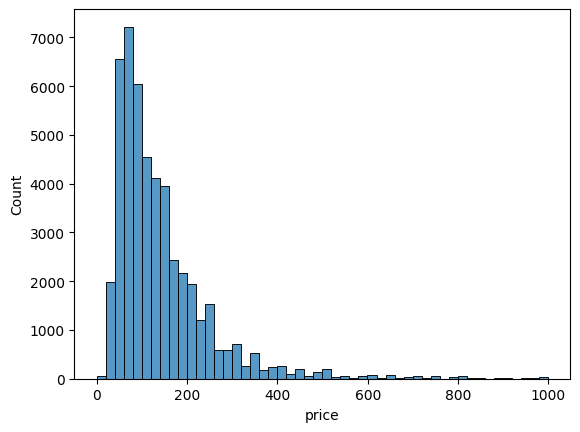

In [1179]:
sns.histplot(df.price[df.price < 1000], bins=50)

In [1180]:
np.log1p([0, 1, 10, 100, 1000])

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478])

In [1181]:
np.log([0 + 1, 1 + 1, 10 + 1, 100 + 1, 1000])

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90775528])

In [1182]:
price_log = np.log1p(df.price)

<Axes: xlabel='price', ylabel='Count'>

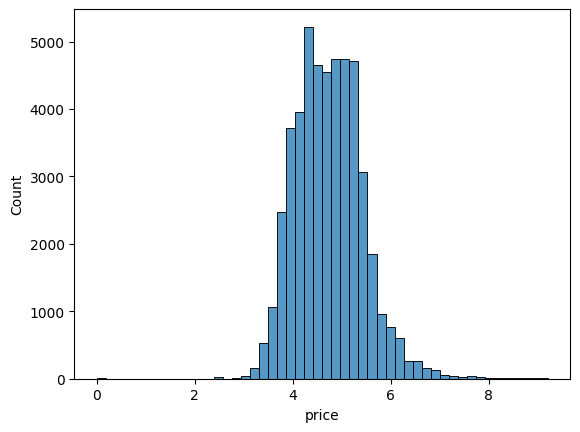

In [1183]:
sns.histplot(price_log, bins=50)

it a normal distribution, model will thrive well in this type of data

SETTING UP VALIDATION FRAMEWORK
* I can either implement it myself or use scikit learn to split the dataset

In [1184]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [1185]:
n_val, n_test, n_train

(9779, 9779, 29337)

In [1186]:
np.random.seed(2) 
idx = np.arange(n) 
np.random.shuffle(idx)

df_shuffled = df.iloc[idx] 

to make sure the results are reproducible, numpy array and uses the array with indices 
to get a shuffled DataFrame

In [1187]:
df_train = df_shuffled.iloc[:n_train].copy() 
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy() 
df_test = df_shuffled.iloc[n_train+n_val:].copy() 

In [1188]:
df_test

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4026,2530057,1bd_in_a_quiet_brownstone_in_harlem,3237558,andre,manhattan,harlem,40.81927,-73.94631,private_room,99,1,0,unk,1.37,1,0
47081,35580805,"private,_cozy,_safe,_two_blocks_from_l_train",893308,simrit_atma,brooklyn,williamsburg,40.70519,-73.93418,private_room,75,3,1,2019-06-17,1.00,3,13
14278,11083362,bedroom_with_full_size_bed_in_washington_heights!,30995829,david,manhattan,washington_heights,40.84411,-73.93784,private_room,50,3,89,2019-06-13,2.54,1,113
45535,34813915,"beauty_apt_,shared_room_in_hell's_kitchen_6",262360035,kuzey,manhattan,hell's_kitchen,40.76558,-73.98785,shared_room,75,1,3,2019-06-30,1.76,6,365
30276,23378281,spacious_loft_bedroom_in_brooklyn_with_2_beds,160721088,nigel,brooklyn,east_flatbush,40.63571,-73.92398,private_room,150,5,1,2019-04-24,0.39,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44566,34305085,splendid_loft_6bed/3bath_-_steps_to_central_park,258249038,joseph_luis,manhattan,upper_west_side,40.79641,-73.96253,entire_home/apt,589,5,4,2019-06-26,4.00,1,109
30280,23379996,all_that_you_need._1_bedroom_in_shared_apt.,35475017,danielle,manhattan,chinatown,40.71473,-73.99091,private_room,62,4,7,2019-01-03,0.43,1,0
6637,4785105,cozy_nolita_apt_-_1_bdr_+_study,18156463,bethany,manhattan,nolita,40.72405,-73.99518,entire_home/apt,149,3,0,unk,1.37,1,0
35343,28039292,my_wife_is_not_used_to_the_noisy_environment._how,5687436,jane,manhattan,financial_district,40.70535,-74.01277,entire_home/apt,200,1,0,unk,1.37,1,0


In [1189]:
idx = np.arange(n)

to be prodicible at RANDOM

In [1190]:
np.random.seed(2)
np.random.shuffle(idx)

In [1191]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [1192]:
df_train.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22043,17735101,quiet_studio_in_the_❤️of_hells_kitchen_for_1_p...,25651976,lola,manhattan,hell's_kitchen,40.76060,-73.99345,entire_home/apt,150,8,8,2019-01-02,0.30,1,11
39679,30888624,"cozy_2_bed_room_gramercy,_new_york",146607158,jason,manhattan,kips_bay,40.73879,-73.98135,entire_home/apt,220,2,1,2018-12-19,0.15,1,0
45220,34607651,comfortable_home_for_all_your_needs!!!,173311396,lyuba,manhattan,east_harlem,40.80013,-73.93742,entire_home/apt,150,1,5,2019-06-23,2.88,1,21
26853,21295942,"modern,_bright,_2_br/2_bath,_clinton_hill,_bklyn",137389534,abby,brooklyn,bedford-stuyvesant,40.68583,-73.95870,entire_home/apt,265,4,16,2019-06-27,0.77,1,144
7366,5434655,new_york_city_dreaming_-_upper_west,3810454,michael,manhattan,upper_west_side,40.79584,-73.97156,entire_home/apt,185,3,0,unk,1.37,1,0


In [1193]:
len(df_train), len(df_val), len(df_test)

(29337, 9779, 9779)

In [1194]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

dropping index column from the dataset

In [1195]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [1196]:
del df_train['price']
del df_val['price']
del df_test['price']

deleting the target(x) so that i dont acccidentally use it during the training 

In [1197]:
len(y_train)

29337

Training linear Regression
* Typically, i shouldn't be doing this by hand; instead, i can just let a framework do this for me. In this chapter, however, i want to show that there is no magic inside these frameworks: it’s just code

In [1198]:
df_train.iloc[2]

id                                                              34607651
name                              comfortable_home_for_all_your_needs!!!
host_id                                                        173311396
host_name                                                          lyuba
neighbourhood_group                                            manhattan
neighbourhood                                                east_harlem
latitude                                                        40.80013
longitude                                                      -73.93742
room_type                                                entire_home/apt
minimum_nights                                                         1
number_of_reviews                                                      5
last_review                                                   2019-06-23
reviews_per_month                                                   2.88
calculated_host_listings_count                     

sighting minimum_nights, number_of_reviews and availability_365 as features to predict

In [1199]:
xi = [1, 5, 337]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [1200]:
def linear_regression(xi):
    
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred

In [1201]:
xi = [1, 5, 337]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [1202]:
linear_regression(xi)

8.054

In [1203]:
np.expm1(8.054)

np.float64(3145.3552549937476)

In [1204]:
np.log1p(3145.3552549937476)

np.float64(8.054)

Vector Form

In [1205]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + w[j] * xi[j]
    return res

In [1206]:
w_new = [w0] + w
w_new 

[7.17, 0.01, 0.04, 0.002]

In [1207]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [1208]:
linear_regression(xi)

8.054

In [1209]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w 

x1 = [1, 1, 8, 144]
x2 = [1, 132, 25, 310]
x10 = [1, 1, 5, 337]

X = [x1, x2, x10]
X = np.array(X)
X


array([[  1,   1,   8, 144],
       [  1, 132,  25, 310],
       [  1,   1,   5, 337]])

In [1210]:
def linear_regression(X):
    return X.dot(w_new)

linear_regression(X)

array([ 7.788, 10.11 ,  8.054])

In [1211]:
def train_linear_regression(X, y):
    pass

In [1212]:
X = [  [ 1,   8,  144],
       [132,  25, 310],
       [ 1,   5,  337],
       [ 3,   89,  365],
       [ 8,   8,   11],
       [ 2,   1,    0],
       [ 0,   16, 144],
       [ 3,   0,    0],
       [ 5,   10, 186]
    ]
X = np.array(X)
X

array([[  1,   8, 144],
       [132,  25, 310],
       [  1,   5, 337],
       [  3,  89, 365],
       [  8,   8,  11],
       [  2,   1,   0],
       [  0,  16, 144],
       [  3,   0,   0],
       [  5,  10, 186]])

In [1213]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [1214]:
X = (np.column_stack([ones, X]))

In [1215]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [1216]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [1217]:
w0, w

(7.17, [0.01, 0.04, 0.002])

AIRBNB PRICE BASELINE

In [1218]:
df_train.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Building the model base on some selected feature from the columns partaining to the Airbnb.

In [1219]:
df_train.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [1220]:
base_line = ['minimum_nights', 'calculated_host_listings_count',  'number_of_reviews', 'availability_365', 'reviews_per_month']

In [1221]:
df_train[base_line]

,minimum_nights,calculated_host_listings_count,number_of_reviews,availability_365,reviews_per_month
0,8,1,8,11,0.30
1,2,1,1,0,0.15
2,1,1,5,21,2.88
3,4,1,16,144,0.77
4,3,1,0,0,1.37
...,...,...,...,...,...
29332,29,1,5,2,0.08
29333,4,1,45,87,0.75
29334,3,1,0,0,1.37
29335,2,1,12,320,0.27


what i will need to do is to extract values from the features above

In [1222]:
X_train = df_train[base_line].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [1223]:
w0, w

(np.float64(4.704463221034256),
 array([ 0.00016023,  0.00229607, -0.0004619 ,  0.00044926, -0.01545233]))

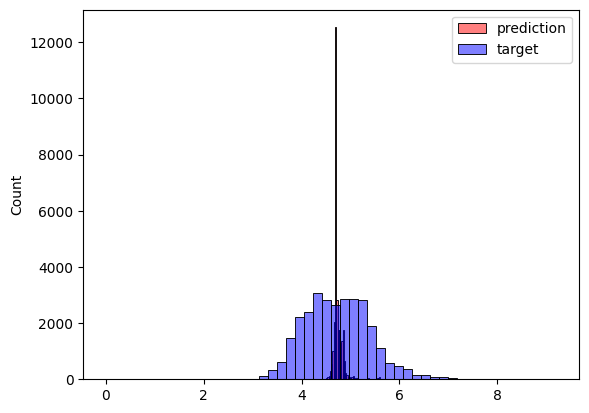

In [1224]:
sns.histplot(y_pred, color='red', label='prediction', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', label='target', alpha=0.5, bins=50)
plt.legend()

In [1225]:
#def rmse(y, y_pred):
#    se = (y - y_pred) ** 2
#    mse = se.mean()
#    return np.sqrt(mse)

In [1226]:
def rmse(y, y_pred):
    error = y_pred - y 
    mse = (error ** 2).mean() 
    return np.sqrt(mse)

In [1227]:
rmmse_score = rmse(y_train, y_pred)
round(rmmse_score, 2)

np.float64(0.69)

VALIDATION FRAMEWORK

In [1228]:
def prepare_X(df):
    df_new = df[base_line]
    df_new = df_new.fillna(0)
    X = df_new.values
    return X

In [1229]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train) # training part

X_val = prepare_X(df_val) # validation part
y_pred = w0 + X_val.dot(w0)

rmse(X_val, y_pred)

np.float64(308.9974772164405)

In [1230]:
y_pred = w0 + X_val.dot(w)

In [1231]:
rmse(y_val, y_pred)

np.float64(0.6841027432675146)

In [1232]:
base_line = ['minimum_nights', 'calculated_host_listings_count',  'number_of_reviews', 'availability_365', 'reviews_per_month']

X_train = df_train[base_line].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w0)

FEATURE ENGINEERING
* To create or add feature that will improve evaluation score of the model.

In [1233]:
def prepare_X(df):
    df = df.copy()
    features = base_line.copy()
    
    features = base_line + ['latitude', 'longitude']
    
    df_new = df[features]
    df_new = df_new.fillna(0)
    X = df_new.values
    
    return X

In [1234]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.6476344610295429)

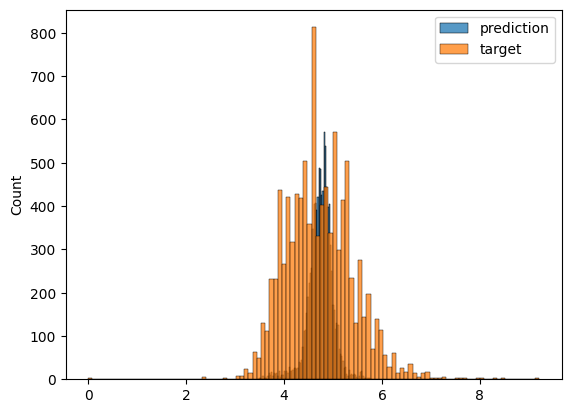

In [1235]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_val, label='target')
plt.legend()

Thus, i conclude that adding 'latitude' and 'longitude' is indeed helpful
when making predictions.
We can also look at the distribution of the predicted values

CATEGORICAL VARIABLE

In [1236]:
categorical_columns = [ 'neighbourhood_group', 'name', 'host_name', 'neighbourhood', 'room_type' ]

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

In [1237]:
def prepare_X(df):
    df = df.copy()

    features = base_line + ['latitude', 'longitude']
    
    for v in ['manhattan', 'brooklyn', 'queens']: 
        feature = 'is_neighbourhood_%s' % v
        df[feature] = (df['neighbourhood_group'] == v).astype(int)
        features.append(feature)
    
    for name, values in categorical.items():
        for value in values: 
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))    


    df_new = df[features] 
    df_new = df_new.fillna(0)
    X = df_new.values
    return X

In [1238]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 1586066.3306248917


In [1239]:
w0, w

(np.float64(-426.4530653596348),
 array([-2.08639115e+03, -5.81997334e+03,  2.10130773e+03, -5.43949680e+02,
        -1.21045588e+05,  4.84093664e+06,  8.79486031e+06,  4.61176801e+17,
        -2.18810818e+19,  1.08892757e+18, -4.60907342e+17,  2.18813513e+19,
        -1.08865811e+18,  2.69459419e+14,  2.69459419e+14, -1.76538033e+03,
         2.77362992e+03, -1.26576275e+03, -6.00869335e+03,  1.80540862e+03,
         4.92164164e+01,  3.18470132e+02,  3.82979568e+02,  6.91221444e+00,
         5.05889053e+01,  1.03179787e+02, -1.66249619e+03, -5.05935542e+03,
        -1.14338929e+03,  7.51206632e+02,  2.41921713e+02, -3.49612112e+01,
         4.25443829e+01]))

REGULARIZATION
* I saw that adding new features does not always help, and in this case, it made things a lot worse. 
* The reason for this behavior is numerical instability.

In [1240]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001]
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [1241]:
y = [1, 2, 3, 1, 2, 3]

In [1242]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [1243]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

np.float64(0.48511577902826936)

TUNING MODEL

In [1244]:
for r in [ 0.0, 0.00001, 0.0001, 0.001, 0.01, 1, 10, 100, 1000]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print('%6s' %r, rmse(y_val, y_pred))

   0.0 1586066.3306248917
 1e-05 0.48518929497712554
0.0001 0.4851727291246261
 0.001 0.48511577902826936
  0.01 0.48585070190806406
     1 0.48691875124363865
    10 0.48689294406412786
   100 0.48873470307726974
  1000 0.49668624588697036


* Also you will notice a trend that the performance for values below 0.1 don’t change much except in the sixth digit, which we shouldn’t consider to be significant.

In [1245]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
X_val = prepare_X(df_val)

y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.48585070190806406
test: 0.48830337179836386


pretty close, i can conclude that the model can generalize well to the new unseen data. 

USING THE MODEL

In [1246]:
X_test = prepare_X(df_test)

# Predict
y_pred = w0 + X_test.dot(w)

# If log-transformed during training
y_pred_real = np.expm1(y_pred)

# See the range
print("Min price:", round(y_pred_real.min(), 2))
print("Max price:", round(y_pred_real.max(), 2))
print("Mean price:", round(y_pred_real.mean(), 2))


Min price: 3124751250517570.5
Max price: 3.0046734416363196e+16
Mean price: 1.2975880737299934e+16


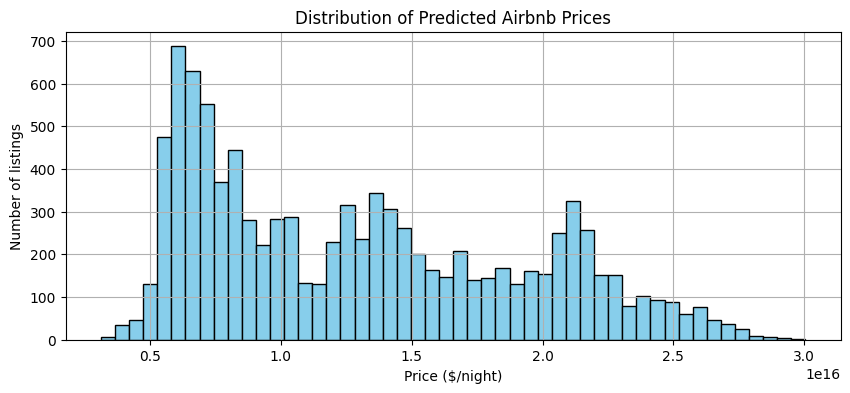

In [1247]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.hist(y_pred_real, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Airbnb Prices')
plt.xlabel('Price ($/night)')
plt.ylabel('Number of listings')
plt.grid(True)
plt.show()


suggesting amount of vacation home on airbnb websites for a user 

In [1248]:
df = df_test.iloc[-1].to_dict()
df

{'id': 19171294,
 'name': 'private_bedroom_w/desk_and_fridge,_close_to_jfk',
 'host_id': 134070513,
 'host_name': 'conrad',
 'neighbourhood_group': 'queens',
 'neighbourhood': 'cambria_heights',
 'latitude': 40.70133,
 'longitude': -73.74212,
 'room_type': 'private_room',
 'minimum_nights': 1,
 'number_of_reviews': 2,
 'last_review': '2018-07-27',
 'reviews_per_month': 0.17,
 'calculated_host_listings_count': 1,
 'availability_365': 37}

In [1249]:
end_user = {'id': 34940602,
 'name': 'perfect_peace_private_room_in_brooklyn',
 'host_id': 263282580,
 'host_name': 'caritas',
 'neighbourhood_group': 'brooklyn',
 'neighbourhood': 'bedford-stuyvesant',
 'latitude': 40.69593,
 'longitude': -73.93503,
 'room_type': 'private_room',
 'minimum_nights': 2,
 'number_of_reviews': 2,
 'last_review': '2019-05-26',
 'reviews_per_month': 1.25,
 'calculated_host_listings_count': 2,
 'availability_365': 171}

In [1250]:
df_test = pd.DataFrame([end_user])
df_test

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,34940602,perfect_peace_private_room_in_brooklyn,263282580,caritas,brooklyn,bedford-stuyvesant,40.69593,-73.93503,private_room,2,2,2019-05-26,1.25,2,171


In [1251]:
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)

In [1252]:
suggestion = np.expm1(y_pred)
suggestion

array([65.10415837])

In [1253]:
import pickle

model_file = 'airbnb-model.bin'

model_data = {
    'w0': w_0,
    'w': w,
    'baseline': base_line,
    'categorical': categorical
}

with open(model_file, 'wb') as f_out:
    pickle.dump(model_data, f_out)

print(f"Model saved to {model_file}")


Model saved to airbnb-model.bin
